In [1]:
import os
os.getcwd()
os.chdir("C:/Users/Meksks/YandexDisk-diastemer@yandex.ru/ФЕНЕК/Thesis MSc")
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn import metrics
import random 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV,train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import imblearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import pylab
import graphviz 
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_excel('1 выборка.xlsx')
scaler = MinMaxScaler()
X = df.drop(['Наименование на английском','Банкрот'],axis=1)
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X.columns = ['2019, Чистые активы', '2019, Оборотные активы', '2019, Активы  всего', '2019, Капитал и резервы', '2019, Краткосрочные обязательства', '2019, Пассивы всего', '2019, Собственный оборотный капитал', '2019, Выручка', '2019, Прибыль (убыток) от продажи', '2019, Прибыль (убыток) до налогообложения' , '2019, Чистая прибыль (убыток)', '2019, Оборачиваемость кредиторской задолженности, разы', '2019, Коэффициент оборачиваемости совокупных активов, %', '2019, Коэффициент соотношения заемных и собственных средств, %','2019, Коэффициент концентрации собственного капитала (автономии), %','2019, Коэффициент маневренности собственных средств, %','2019, Коэффициент обеспеченности собственными оборотными средствами, %','2019, Рентабельность продаж, %','2019, Рентабельность затрат, %','2019, Коэффициент текущей ликвидности, %']

X[:5]

,"2019, Чистые активы","2019, Оборотные активы","2019, Активы всего","2019, Капитал и резервы","2019, Краткосрочные обязательства","2019, Пассивы всего","2019, Собственный оборотный капитал","2019, Выручка","2019, Прибыль (убыток) от продажи","2019, Прибыль (убыток) до налогообложения","2019, Чистая прибыль (убыток)","2019, Оборачиваемость кредиторской задолженности, разы","2019, Коэффициент оборачиваемости совокупных активов, %","2019, Коэффициент соотношения заемных и собственных средств, %","2019, Коэффициент концентрации собственного капитала (автономии), %","2019, Коэффициент маневренности собственных средств, %","2019, Коэффициент обеспеченности собственными оборотными средствами, %","2019, Рентабельность продаж, %","2019, Рентабельность затрат, %","2019, Коэффициент текущей ликвидности, %"
0,0.006809,0.000106,0.000053,0.006828,0.003697,0.000053,0.338538,0.000020,0.282232,0.126558,0.180090,0.001193,0.000148,0.455397,0.978171,0.676541,0.978121,0.361471,0.126310,0.000069
1,0.006792,0.000056,0.000027,0.006811,0.003679,0.000027,0.338476,0.000032,0.282294,0.126818,0.180244,0.002625,0.000598,0.455381,0.979092,0.676571,0.979092,0.368876,0.127523,0.000139
2,0.006776,0.000038,0.000018,0.006795,0.003688,0.000018,0.338416,0.000096,0.282198,0.126379,0.179822,0.001520,0.000836,0.455416,0.977458,0.676571,0.977457,0.342498,0.123458,0.000056
3,0.006783,0.000099,0.000048,0.006802,0.003692,0.000048,0.338536,0.000024,0.282160,0.126620,0.180037,0.001236,0.000158,0.455493,0.976033,0.676571,0.976032,0.346135,0.123977,0.000076
4,0.006772,0.000055,0.000026,0.006791,0.003710,0.000026,0.338399,0.000027,0.282182,0.126335,0.179764,0.001194,0.000309,0.455540,0.975632,0.676564,0.975620,0.349707,0.124497,0.000045


In [4]:
X.feature_names = ['2019, Чистые активы', '2019, Оборотные активы', '2019, Активы  всего', '2019, Капитал и резервы', '2019, Краткосрочные обязательства', '2019, Пассивы всего', '2019, Собственный оборотный капитал', '2019, Выручка', '2019, Прибыль (убыток) от продажи', '2019, Прибыль (убыток) до налогообложения' , '2019, Чистая прибыль (убыток)', '2019, Оборачиваемость кредиторской задолженности, разы', '2019, Коэффициент оборачиваемости совокупных активов, %', '2019, Коэффициент соотношения заемных и собственных средств, %','2019, Коэффициент концентрации собственного капитала (автономии), %','2019, Коэффициент маневренности собственных средств, %','2019, Коэффициент обеспеченности собственными оборотными средствами, %','2019, Рентабельность продаж, %','2019, Рентабельность затрат, %','2019, Коэффициент текущей ликвидности, %']
y = df['Банкрот']
y.feature_names = ['Банкрот']

y.columns = ['Банкрот']
df = pd.concat([df['Банкрот'],X],axis=1)

In [5]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 2253, 1: 29})


In [49]:
# transform the dataset#####################
############################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

oversample = SMOTE()
X1, y1 = oversample.fit_resample(X_train, y_train)

In [127]:
Counter(y1)

Counter({0: 1802, 1: 1802})

In [7]:
# summarize class distribution
counter = Counter(y_test)
print(counter)

Counter({0: 451, 1: 6})


In [22]:
def precision(conf):
    TP = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    TN = conf[1, 1]
    if (TP + FP) == 0:
        result = 0
    else:
        result = TP / (TP + FP)
    return round(result, 3)


def recall(conf):  # same as sensitivity
    TP = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    TN = conf[1, 1]
    if (TP + FN) == 0:
        result = 0
    else:    
        result = TP / (TP + FN)
    return round(result, 3)


def specificity(conf):
    TP = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    TN = conf[1, 1]
    if (TN + FP) == 0:
        result = 0
    else:    
        result = TN / (TN + FP)
    return round(result, 3)

## DECISION TREE ##

###########################################

In [8]:
clf = DecisionTreeClassifier(min_samples_leaf = 5)
sfs = SequentialFeatureSelector(clf, n_features_to_select=3)
sfs.fit(X1, y1)
print(sfs.get_support())
new_data7 = sfs.transform(X1)

clf = clf.fit(new_data7, y1)

new_test7 = sfs.transform(X_test)
#cv of model
print('accuracy: %.3f'% clf.score(new_test7, y_test))
#scores = cross_val_score(clf, new_test7, y_test, cv=2)
#print('Mean accuracy: %.3f' % mean(scores))

y_pred = clf.predict(new_test7)
print(confusion_matrix(y_test, y_pred))

[False False False False False False False False  True False False  True
 False False False  True False False False False]
accuracy: 0.928
[[424  27]
 [  6   0]]


In [9]:
#PCA unstable and bad

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X1)

print(pca.fit(X1).explained_variance_ratio_)
clf = clf.fit(X_pca, y1)

X_pca_test = pca.fit_transform(X_test)

#cv of model
print('accuracy: %.3f'% clf.score(X_pca_test, y_test))
#scores = cross_val_score(clf, new_test7, y_test, cv=2)
#print('Mean accuracy: %.3f' % mean(scores))

y_pred = clf.predict(X_pca_test)
print(confusion_matrix(y_test, y_pred))

[0.74926958 0.09170636 0.0708222  0.0342926  0.01671341 0.00983078]
accuracy: 0.967
[[442   9]
 [  6   0]]


###########################################

In [10]:
clf = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 4)
sfs = SequentialFeatureSelector(clf, n_features_to_select=5)
sfs.fit(X1, y1)
print(sfs.get_support())
new_data7 = sfs.transform(X1)

clf_fit = clf.fit(new_data7, y1)

new_test7 = sfs.transform(X_test)
#cv of model
print('accuracy: %.3f'% clf_fit.score(new_test7, y_test))
#scores = cross_val_score(clf, new_test7, y_test, cv=2)
#print('Mean accuracy: %.3f' % mean(scores))

y_pred = clf_fit.predict(new_test7)
print(confusion_matrix(y_test, y_pred))

[False False False False  True False  True False False False False  True
 False False  True False  True False False False]
accuracy: 0.847
[[386  65]
 [  5   1]]


In [11]:
#clf = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 4)
#sfs = SequentialFeatureSelector(clf, n_features_to_select=5)

#[False False False False  True  True False False False  True False False
 #False False False False  True False False  True]
#accuracy: 0.832
#[[376  75]
 #[  2   4]]

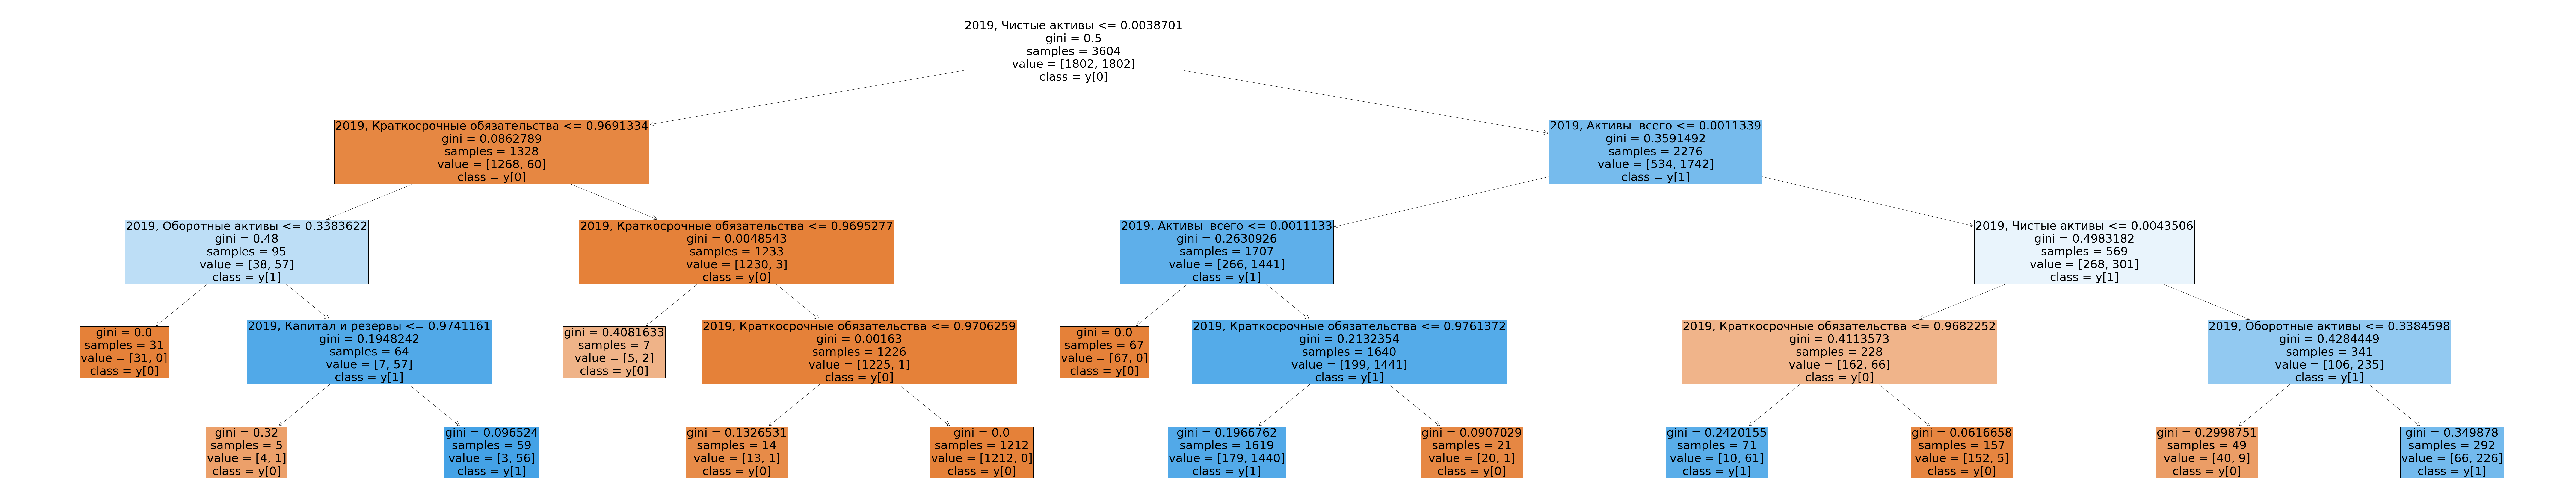

In [12]:
#plt.rcParams["figure.figsize"] = [100,49]
#plt.rcParams["font.size"] = 100

fig = plt.figure(figsize=(200,40))

_ = tree.plot_tree(clf_fit,filled=True,feature_names=X.feature_names, class_names=True, fontsize =50,precision=7)
plt.show()
fig.savefig('itree.pdf')

## LOGISTIC REGRESSION ##

In [55]:
precision_list = []
specificity_list = []
recall_list = []
accuracy_list = []

clf = LogisticRegression(random_state=0) #.fit(X, y)

for i in range(1,11):

    sfs = SequentialFeatureSelector(clf, n_features_to_select=i)
    sfs.fit(X1, y1)
#print(sfs.get_support())
    new_data7 = sfs.transform(X1)

    clf_fit = clf.fit(new_data7, y1)

    new_test7 = sfs.transform(X_test)
#cv of model
    print(i)
    print('accuracy: %.3f'% clf_fit.score(new_test7, y_test))
#scores = cross_val_score(clf_fit, new_test7, y_test, cv=5)
#print('Mean accuracy: %.3f' % mean(scores))

    y_pred = clf_fit.predict(new_test7)
    conf = confusion_matrix(y_test, y_pred)
    
    
    print('факторов: ',i)
    print('accuracy: %.3f'% clf.score(new_test7, y_test))
    print(conf)
    print('Precision:', precision(conf))
    print('Recall:', recall(conf))
    print('Specificity:', specificity(conf))
    print('')
    
    precision_result = precision(conf)
    recall_result = recall(conf)
    specificity_result = specificity(conf)
    accuracy_result = clf_fit.score(new_test7, y_test)

    precision_list.append(precision_result)
    specificity_list.append(specificity_result)
    recall_list.append(recall_result)
    accuracy_list.append(accuracy_result)

1
accuracy: 0.853
факторов:  1
accuracy: 0.853
[[386  65]
 [  2   4]]
Precision: 0.856
Recall: 0.995
Specificity: 0.058

2
accuracy: 0.858
факторов:  2
accuracy: 0.858
[[388  63]
 [  2   4]]
Precision: 0.86
Recall: 0.995
Specificity: 0.06

3
accuracy: 0.858
факторов:  3
accuracy: 0.858
[[390  61]
 [  4   2]]
Precision: 0.865
Recall: 0.99
Specificity: 0.032

4
accuracy: 0.862
факторов:  4
accuracy: 0.862
[[392  59]
 [  4   2]]
Precision: 0.869
Recall: 0.99
Specificity: 0.033

5
accuracy: 0.842
факторов:  5
accuracy: 0.842
[[383  68]
 [  4   2]]
Precision: 0.849
Recall: 0.99
Specificity: 0.029

6
accuracy: 0.877
факторов:  6
accuracy: 0.877
[[397  54]
 [  2   4]]
Precision: 0.88
Recall: 0.995
Specificity: 0.069

7
accuracy: 0.858
факторов:  7
accuracy: 0.858
[[388  63]
 [  2   4]]
Precision: 0.86
Recall: 0.995
Specificity: 0.06

8
accuracy: 0.853
факторов:  8
accuracy: 0.853
[[386  65]
 [  2   4]]
Precision: 0.856
Recall: 0.995
Specificity: 0.058

9
accuracy: 0.849
факторов:  9
accuracy:

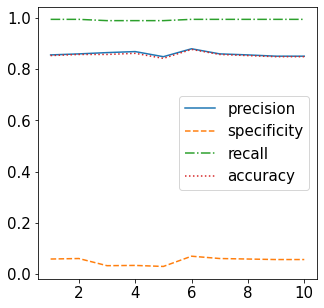

In [57]:
number_of_leafs = list(range(1, 11))
# plot lines
font = {'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
plt.figure(figsize=(5, 5))
plt.plot(number_of_leafs, precision_list, label="precision", linestyle="-")
plt.plot(number_of_leafs, specificity_list, label="specificity", linestyle="--")
plt.plot(number_of_leafs, recall_list, label="recall", linestyle="-.")
plt.plot(number_of_leafs, accuracy_list, label="accuracy", linestyle=":")
plt.legend()
plt.show()

In [101]:
clf = LogisticRegression(random_state=0) #.fit(X, y)


sfs = SequentialFeatureSelector(clf, n_features_to_select=6)
sfs.fit(X1, y1)
#print(sfs.get_support())
new_data7 = sfs.transform(X1)

clf_fit = clf.fit(new_data7, y1)

new_test7 = sfs.transform(X_test)
#cv of model

print('accuracy: %.3f'% clf_fit.score(new_test7, y_test))
#scores = cross_val_score(clf_fit, new_test7, y_test, cv=5)
#print('Mean accuracy: %.3f' % mean(scores))

y_pred = clf_fit.predict(new_test7)
conf = confusion_matrix(y_test, y_pred)
    
    

print(conf)
print('Precision:', precision(conf))
print('Recall:', recall(conf))
print('Specificity:', specificity(conf))
print('')

accuracy: 0.877
[[397  54]
 [  2   4]]
Precision: 0.88
Recall: 0.995
Specificity: 0.069



In [119]:
feature_coef = pd.DataFrame(clf_fit.coef_)

In [120]:
selected_feature = pd.DataFrame(sfs.get_support())

In [121]:
selected_feature.index = X.columns.T
selected_feature.columns = ['include']
selected_feature = selected_feature[(selected_feature['include']==True)]

In [122]:
feature_coef = feature_coef.T

In [125]:
feature_coef.index = selected_feature.index
feature_coef.columns = ['coef'] 


In [126]:
feature_coef

,coef
"2019, Оборотные активы",1.146207
"2019, Собственный оборотный капитал",1.139455
"2019, Прибыль (убыток) до налогообложения",-1.813287
"2019, Коэффициент оборачиваемости совокупных активов, %",-1.136090
"2019, Коэффициент соотношения заемных и собственных средств, %",0.673838
"2019, Коэффициент обеспеченности собственными оборотными средствами, %",-2.228569


In [14]:
#clf = LogisticRegression(random_state=0) #.fit(X, y)
###########################################
#highest accuracy: n_features_to_select = 8
###########################################
#accuracy: 0.884
#[[400  51]
# [  2   4]]

## SUPPORT VECTOR MACHINE ##

In [64]:
precision_list = []
specificity_list = []
recall_list = []
accuracy_list = []

#building SVM model 
for i in range(1,15):
    clf = LinearSVC(C=0.01,max_iter=10000)
    sfs = SequentialFeatureSelector(clf, n_features_to_select=i)
    sfs.fit(X1, y1)
#print(sfs.get_support())
    new_dataL = sfs.transform(X1)

    clf = LinearSVC(C=0.01,max_iter=10000)
    clf.fit(new_dataL, y1)

    new_testL = sfs.transform(X_test)

#implementing CV
    
    #scores = cross_val_score(clf, new_testL, y_test, cv=5)
    #print('Mean accuracy: %.3f' % mean(scores))
    y_pred = clf.predict(new_testL)
    conf = confusion_matrix(y_test, y_pred)
    
    
    print('факторов: ',i)
    print('accuracy: %.3f'% clf.score(new_testL, y_test))
    print(conf)
    print('Precision:', precision(conf))
    print('Recall:', recall(conf))
    print('Specificity:', specificity(conf))
    print('')
    
    precision_result = precision(conf)
    recall_result = recall(conf)
    specificity_result = specificity(conf)
    accuracy_result = clf.score(new_testL, y_test)

    precision_list.append(precision_result)
    specificity_list.append(specificity_result)
    recall_list.append(recall_result)
    accuracy_list.append(accuracy_result)

факторов:  1
accuracy: 0.619
[[278 173]
 [  1   5]]
Precision: 0.616
Recall: 0.996
Specificity: 0.028

факторов:  2
accuracy: 0.621
[[278 173]
 [  0   6]]
Precision: 0.616
Recall: 1.0
Specificity: 0.034

факторов:  3
accuracy: 0.630
[[282 169]
 [  0   6]]
Precision: 0.625
Recall: 1.0
Specificity: 0.034

факторов:  4
accuracy: 0.632
[[283 168]
 [  0   6]]
Precision: 0.627
Recall: 1.0
Specificity: 0.034

факторов:  5
accuracy: 0.639
[[286 165]
 [  0   6]]
Precision: 0.634
Recall: 1.0
Specificity: 0.035

факторов:  6
accuracy: 0.639
[[286 165]
 [  0   6]]
Precision: 0.634
Recall: 1.0
Specificity: 0.035

факторов:  7
accuracy: 0.639
[[286 165]
 [  0   6]]
Precision: 0.634
Recall: 1.0
Specificity: 0.035

факторов:  8
accuracy: 0.641
[[287 164]
 [  0   6]]
Precision: 0.636
Recall: 1.0
Specificity: 0.035

факторов:  9
accuracy: 0.641
[[287 164]
 [  0   6]]
Precision: 0.636
Recall: 1.0
Specificity: 0.035

факторов:  10
accuracy: 0.639
[[286 165]
 [  0   6]]
Precision: 0.634
Recall: 1.0
Specifi

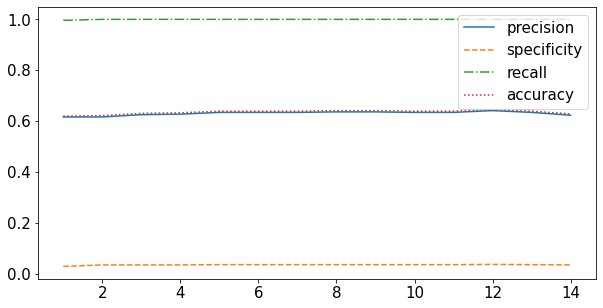

In [65]:
number_of_leafs = list(range(1, 15))
# plot lines
font = {'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
plt.figure(figsize=(10, 5))
plt.plot(number_of_leafs, precision_list, label="precision", linestyle="-")
plt.plot(number_of_leafs, specificity_list, label="specificity", linestyle="--")
plt.plot(number_of_leafs, recall_list, label="recall", linestyle="-.")
plt.plot(number_of_leafs, accuracy_list, label="accuracy", linestyle=":")
plt.legend()
plt.show()

In [128]:
clf = LinearSVC(C=0.01,max_iter=10000)
sfs = SequentialFeatureSelector(clf, n_features_to_select=5)
sfs.fit(X1, y1)
#print(sfs.get_support())
new_dataL = sfs.transform(X1)

clf = LinearSVC(C=0.01,max_iter=10000)
clf.fit(new_dataL, y1)

new_testL = sfs.transform(X_test)

#implementing CV
    
    #scores = cross_val_score(clf, new_testL, y_test, cv=5)
    #print('Mean accuracy: %.3f' % mean(scores))
y_pred = clf.predict(new_testL)
conf = confusion_matrix(y_test, y_pred)
    
    
print('accuracy: %.3f'% clf.score(new_testL, y_test))
print(conf)
print('Precision:', precision(conf))
print('Recall:', recall(conf))
print('Specificity:', specificity(conf))
print('')
print(sfs.get_support())

accuracy: 0.639
[[286 165]
 [  0   6]]
Precision: 0.634
Recall: 1.0
Specificity: 0.035

[False  True False False  True False False False False  True  True False
 False False False False False  True False False]


In [129]:
features_chosen = pd.DataFrame(sfs.get_support())

In [138]:
features_chosen.index = X1.columns
features_chosen.columns = ['ttt']

features_chosen = features_chosen[(features_chosen['ttt']==True)]

In [139]:
features_chosen

,ttt
"2019, Оборотные активы",True
"2019, Краткосрочные обязательства",True
"2019, Прибыль (убыток) до налогообложения",True
"2019, Чистая прибыль (убыток)",True
"2019, Рентабельность продаж, %",True


In [134]:
coeffs = pd.DataFrame(clf.coef_)

In [143]:
coeffs = coeffs.T
coeffs.index = features_chosen.index

In [144]:
coeffs

,0
"2019, Оборотные активы",0.049362
"2019, Краткосрочные обязательства",0.030154
"2019, Прибыль (убыток) до налогообложения",-0.051598
"2019, Чистая прибыль (убыток)",-0.033965
"2019, Рентабельность продаж, %",-0.565132


In [16]:
#SVM best with 13 params
#13
#accuracy: 0.860
#[[388  63]
 #[  1   5]]

## MORE COMPLEX DECISION TREE ##

In [17]:
tree = DecisionTreeClassifier(max_depth=5)

tree_params = {'max_depth': range(1,11),'max_features': range(4,10),'min_samples_leaf': range(5,15)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1,verbose=True)
tree_grid.fit(X1, y1)

tree_grid.best_params_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


{'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 6}

In [18]:
tree_grid.best_score_, accuracy_score(y_test, tree_grid.predict(X_test))

(0.9680906148867313, 0.9474835886214442)

In [19]:
#does not really make sense due to unbalanced test set
clf = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 10, max_features = 6)

clf_fit = clf.fit(X1, y1)

#cv of model
print('accuracy: %.3f'% clf_fit.score(X_test, y_test))
#scores = cross_val_score(clf, new_test7, y_test, cv=2)
#print('Mean accuracy: %.3f' % mean(scores))

y_pred = clf_fit.predict(X_test)
print(confusion_matrix(y_test, y_pred))

accuracy: 0.945
[[431  20]
 [  5   1]]


In [20]:
type(confusion_matrix(y_test, y_pred))

numpy.ndarray

## KNN ##

In [21]:
for i in range(4,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    for j in range(4,15):
    
        sfs = SequentialFeatureSelector(knn, n_features_to_select=j)
        sfs.fit(X1, y1)
        
        new_dataL = sfs.transform(X1)

        knn = KNeighborsClassifier(n_neighbors=i)
        knn_fit = knn.fit(new_dataL, y1)

        new_testL = sfs.transform(X_test)

#implementing CV
        #print('num neib',i,'n_feat',j)
        #print('accuracy: %.3f'% knn_fit.score(new_testL, y_test))
        y_pred = knn_fit.predict(new_testL)
        #print(confusion_matrix(y_test, y_pred))
        
        conf = confusion_matrix(y_test, y_pred)
        TN = conf[1,1]
        if TN > 3:
            print('num neib',i,'n_feat',j)
            print('accuracy: %.3f'% knn_fit.score(new_testL, y_test))
            print(conf)

KeyboardInterrupt: 

In [ ]:
#a bit unstable but not too bad
#num neib 6 n_feat 7
#accuracy: 0.910
#[[412  39]
# [  2   4]]
#num neib 6 n_feat 10
#accuracy: 0.908
#[[411  40]
# [  2   4]]